In [1]:

%matplotlib inline

# Import dependencies
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt


file = os.path.join('MidwestMurderData.csv')
midwest_homicide_df = pd.read_csv(file)
midwest_homicide_df.columns

Index(['index', 'ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype',
       'Source', 'Solved', 'Year', 'StateName', 'Month', 'Incident',
       'ActionType', 'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace',
       'VicEthnic', 'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon',
       'Relationship', 'Circumstance', 'Subcircum', 'VicCount', 'OffCount',
       'FileDate', 'fstate', 'MSA'],
      dtype='object')

In [2]:
relationship_df = midwest_homicide_df[['Relationship', 'VicSex','Weapon', 'OffSex']]


In [3]:
#Combine similar weapons together
relationship_df['Weapon'] = relationship_df['Weapon'].replace(
                                                {"Knife or cutting instrument": "Sharp Object",
                                                "Handgun - pistol, revolver, etc": "Gun",
                                                "Shotgun": "Gun",
                                                "Strangulation - hanging": "Strangulation",
                                                "Personal weapons, includes beating": "Beating/Personal",
                                                "Blunt object - hammer, club, etc" : "Blunt Object",
                                                "Rifle": "Gun",
                                                "Firearm, type not stated": "Gun",
                                                "Asphyxiation - includes death by gas": "Asphyxiation",
                                                "Other gun": "Gun"})


C:\Users\write\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [4]:
#Combine similar relationships together
relationship_df['Relationship'] = relationship_df["Relationship"].replace(
                                                  {'Brother': 'Sibling',
                                                   'Sister': 'Sibling',
                                                   'Father': 'Parent',
                                                   'Mother': 'Parent',
                                                   'Daughter': 'Child',
                                                   'Son': 'Child',
                                                   'Stepson': 'Child',
                                                   "Stepdaughter": "Child",
                                                   "Homosexual relationship": 'Partner',
                                                   "Boyfriend" : "Partner",
                                                   "Girlfriend" : "Partner",
                                                   "Common-law husband" : "Partner",
                                                   "Common-law wife" : "Partner",
                                                   "Ex-husband" : "Spouse",
                                                   "Ex-wife" : "Spouse",
                                                   "Stepmother" : "Parent",
                                                   "Stepfather" : "Parent",
                                                   "Husband" : "Spouse",
                                                   "Wife" : "Spouse",
                                                  "Friend": 'Other - known to victim',
                                                  "Neighbor": 'Other - known to victim',
                                                  "Employee": 'Other - known to victim',
                                                  "Employer": 'Other - known to victim',
                                                  "In-law" : 'Other - known to victim'})
                                       

C:\Users\write\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [116]:
#Female Datafarme - pull out only female victims
victims_df = relationship_df[['Relationship', 'VicSex']]
female_victims = victims_df.loc[victims_df["VicSex"]=='Female', :]

#Group Female Victims by Relationships
female_victims = female.groupby('Relationship').count()

#Rename columns
female_victims_df = female_victims.rename(columns={"VicSex": "Female Victim"})

#Sort values so graphs are in ascending order
female_df = female_victims_df.reset_index().sort_values("Female Victim")

#Drop the highest outlier value: Relationship Undefined
female_df = female_df.drop(6)

#Unsort female df for double bar chart
unsort_female_df = female_victims_df.reset_index().drop(6)


In [6]:
#Find the sum of all Female Victims
female_df.sum()

Relationship     SiblingOther familyParentChildStrangerOther - ...
Female Victim                                                23810
dtype: object

In [93]:
#Calculate the percentage of female victims by relationship (23810 is the sum of all female victims)
female_percent = female_df['Female Victim']/23810*100
female_percent = female_percent.round()
female_percent

7     1.0
3     3.0
4     4.0
1     9.0
9    11.0
2    12.0
5    17.0
8    21.0
0    22.0
Name: Female Victim, dtype: float64

In [94]:
#Unsorted for double bar chart
unsort_female_percent = unsort_female_df['Female Victim']/23810*100
unsort_female_percent = unsort_female_percent.round()
unsort_female_percent

0    22.0
1     9.0
2    12.0
3     3.0
4     4.0
5    17.0
7     1.0
8    21.0
9    11.0
Name: Female Victim, dtype: float64

In [89]:
#Male Dataframe - Pull out only Male Victims
male = victims_df.loc[victims_df["VicSex"] == "Male", :]

#Group Male Victims by Relationships
male_victims = male.groupby('Relationship').count()

#Rename Columns
male_victims_df = male_victims.rename(columns={"VicSex": "Male Victim"})


#Sort values so graphs are in ascending order
male_df = male_victims_df.reset_index().sort_values("Male Victim")

#Drop the highest outlier value: Relationship Undefined
male_df = male_df.drop(6)

#Unsort male df for double bar chart
unsort_male_df = male_victims_df.reset_index().drop(6)

In [9]:
#Find the sum of all Male Victims
male_df.sum()

Relationship    SiblingParentOther familySpouseChildPartnerOth...
Male Victim                                                 63925
dtype: object

In [76]:
#Calculate the percentage of female victims by relationship (23810 is the sum of all female victims)
male_percent = male_df['Male Victim']/63925*100
male_percent = male_percent.round()

0    40.0
1     4.0
2    16.0
3     2.0
4     2.0
5     4.0
7     2.0
8     4.0
9    26.0
Name: Male Victim, dtype: float64

In [97]:
#Unsorted for double bar chart
unsort_male_percent = unsort_male_df['Male Victim']/63925*100
unsort_male_percent = unsort_male_percent.round()
unsort_male_percent

0    40.0
1     4.0
2    16.0
3     2.0
4     2.0
5     4.0
7     2.0
8     4.0
9    26.0
Name: Male Victim, dtype: float64

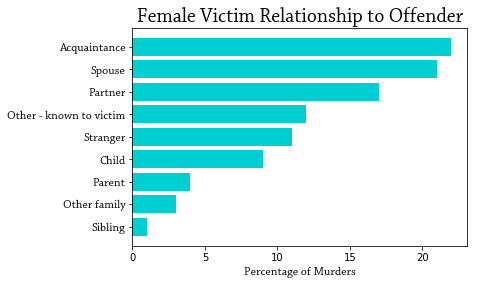

In [73]:
#Plot Female Victim Relationship Information
y_axis = np.arange(len(female_percent))
tick_locations = [value for value in y_axis]

#plt.figure(figsize=(20,3))
plt.barh(y_axis, female_percent, color='darkturquoise', alpha= 1.0, align="center")
plt.yticks(tick_locations, female_df["Relationship"], fontname='Chaparral Pro', 
           fontsize=12, rotation="horizontal")

# Set a Title and labels
plt.title("Female Victim Relationship to Offender", fontname='Chaparral Pro', fontsize=20)
plt.xlabel("Percentage of Murders", fontname='Chaparral Pro', fontsize=12)
plt.show()

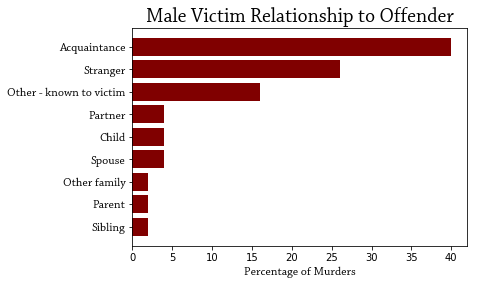

In [74]:
#Plot Male Victim Relationship Information
y_axis = np.arange(len(male_percent))
tick_locations = [value for value in y_axis]

#plt.figure(figsize=(20,3))
plt.barh(y_axis, male_percent, color='maroon', alpha= 1.0, align="center")
plt.yticks(tick_locations, male_df["Relationship"], fontname='Chaparral Pro', 
           fontsize=12, rotation="horizontal")

# Set a Title and labels
plt.title("Male Victim Relationship to Offender", fontname='Chaparral Pro', fontsize=20)
plt.xlabel("Percentage of Murders", fontname='Chaparral Pro', fontsize=12)
plt.show()

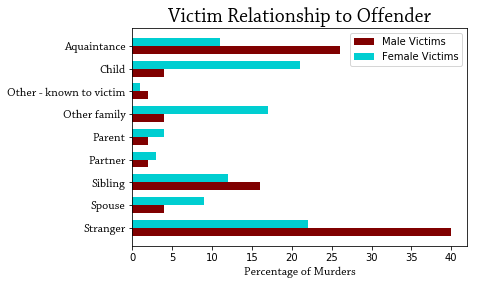

In [92]:
#PLOTTING VICTIM RELATIONSHIPS

#Set the length of the Y axis
# N = 9

# # #Set the data points for male and female bars
# male_data = (unsort_male_percent)
# female_data = (unsort_female_percent)

# # #Plot the bars
# ind = np.arange(N)
# width = 0.35
# plt.barh(ind, male_data, width, color='maroon', label='Male Victims')
# plt.barh(ind + width, female_data, width, color='darkturquoise', label='Female Victims')

# # #Set the Y axis ticks between the two bars
# plt.yticks(ind + width / 2, ['Stranger', 'Spouse', 'Sibling', 'Partner', 'Parent',
#                             'Other family', 'Other - known to victim', 'Child', 'Aquaintance'],
#                             fontname= 'Chaparral Pro', fontsize=12)

# # #Set legend
# plt.legend(loc='upper right')

# # # Set a Title and labels
# plt.title("Victim Relationship to Offender", fontname= 'Chaparral Pro', fontsize=20)
# plt.xlabel("Percentage of Murders", fontname= 'Chaparral Pro', fontsize=12)
# plt.show()

In [112]:
#Weapons grouping
relationship_df['Weapon'].unique()

array(['Sharp Object', 'Gun', 'Strangulation', 'Beating/Personal',
       'Blunt Object', 'Other or type unknown', 'Fire', 'Asphyxiation',
       'Drowning', 'Pushed or thrown out window',
       'Narcotics or drugs, sleeping pills', 'Explosives',
       'Poison - does not include gas'], dtype=object)

In [107]:
#Female Gun Victims by Relationship
guns_df = relationship_df.loc[relationship_df['Weapon'] == "Gun", :]
guns_df = guns_df.loc[guns_df['VicSex'] == 'Female', :]
female_gun_victims = guns_df.groupby('Relationship')['Weapon'].count()

Relationship
Acquaintance                   2396
Child                           494
Other - known to victim        1172
Other family                    203
Parent                          389
Partner                        2069
Relationship not determined    4082
Sibling                         186
Spouse                         3397
Stranger                       1295
Name: Weapon, dtype: int64

In [109]:
#Male Gun Victims by Relationship
guns_df = relationship_df.loc[relationship_df['Weapon'] == "Gun", :]
guns_df = guns_df.loc[guns_df['VicSex'] == 'Male', :]
male_gun_victims = guns_df.groupby('Relationship')['Weapon'].count()
male_gun_victims

Relationship
Acquaintance                   17653
Child                            737
Other - known to victim         6592
Other family                     830
Parent                           736
Partner                         1120
Relationship not determined    38080
Sibling                          714
Spouse                          1659
Stranger                       13132
Name: Weapon, dtype: int64

In [ ]:
weapon_df

Python
subsetDataFrame = dfObj[dfObj['Product'].isin(['Mangos', 'Grapes']) ]
1
subsetDataFrame = dfObj[dfObj['Product'].isin(['Mangos', 'Grapes']) ]